In [57]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfe
import os
import colorcet as cc
import vivaldi_a as vvld

print(mpl.rcParams.keys())
mpl.rcParams['font.size'] = 18
mpl.rcParams["figure.constrained_layout.use"] = True

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [2]:
os.chdir('/glade/scratch/plichtig/archive/f.e22.FCnudged.f09_f09_mg17.FVforspinup/atm/hist/')

<xarray.Dataset>
Dimensions:           (lat: 192, lon: 288, lev: 32, ilev: 33, time: 1, nbnd: 2)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon               (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) object 2019-06-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/969)
    gw                (lat) float64 ...
    hyam              (lev) float64 ...
    hybm              (lev) float64 ...
    P0                float64 ...
    hyai              (ilev) float64 ...
    hybi              (ilev) float64 ...
    ...                ...
    soa5_c1           (time, lev, lat, lon) float32 ...
    soa5_c1DDF        (time, lat, lon) float32 ...
    soa5_c1SFWET      (time, lat, lon) float32 ...
    soa5_c2           (time, lev, lat, lon) float32 ...
    soa5_c2DDF        (time, lat, lon) float32 ...
    soa5_c2SFWET      (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.FCnudged.f09_f09_mg17.FVforspinup
    logname:           plichtig
    host:              cheyenne5
    initial_file:      /glade/p/cesmdata/cseg/inputdata/atm/cam/inic/fv/f.e22...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

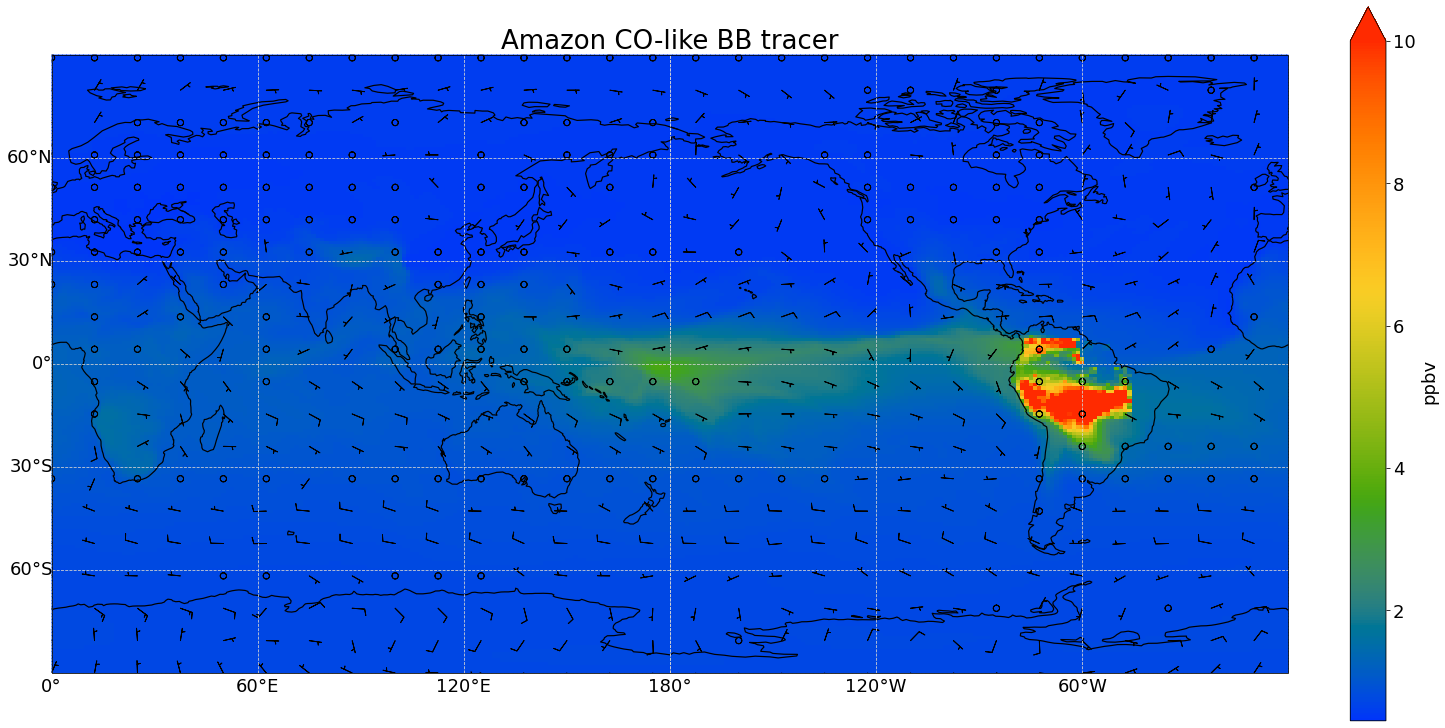

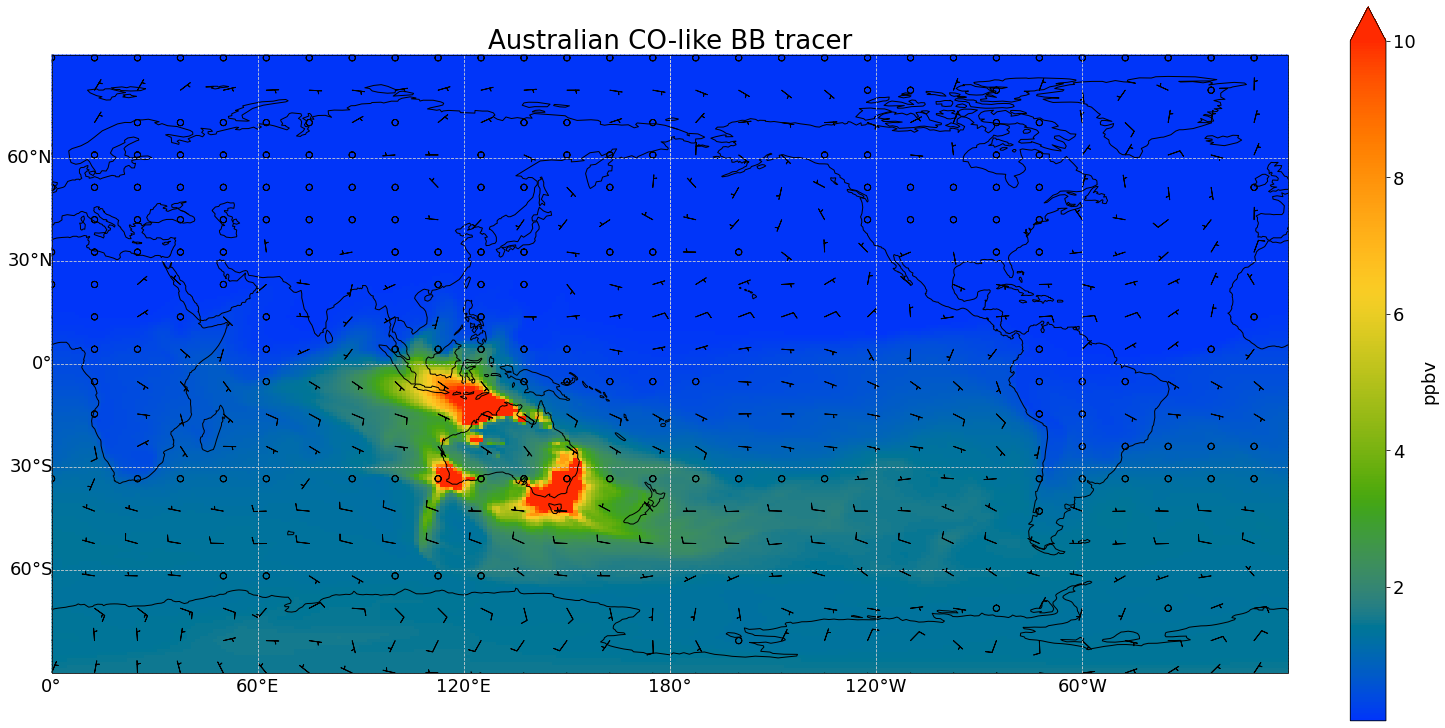

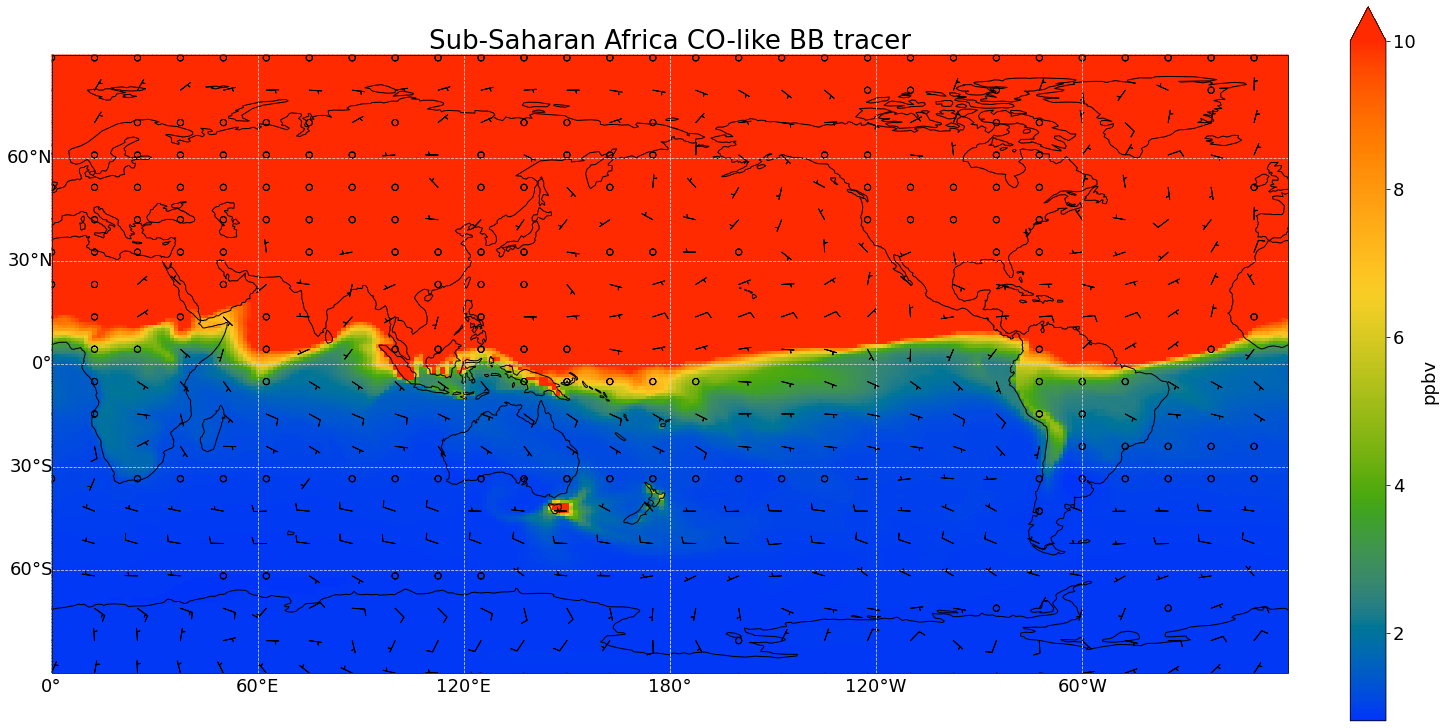

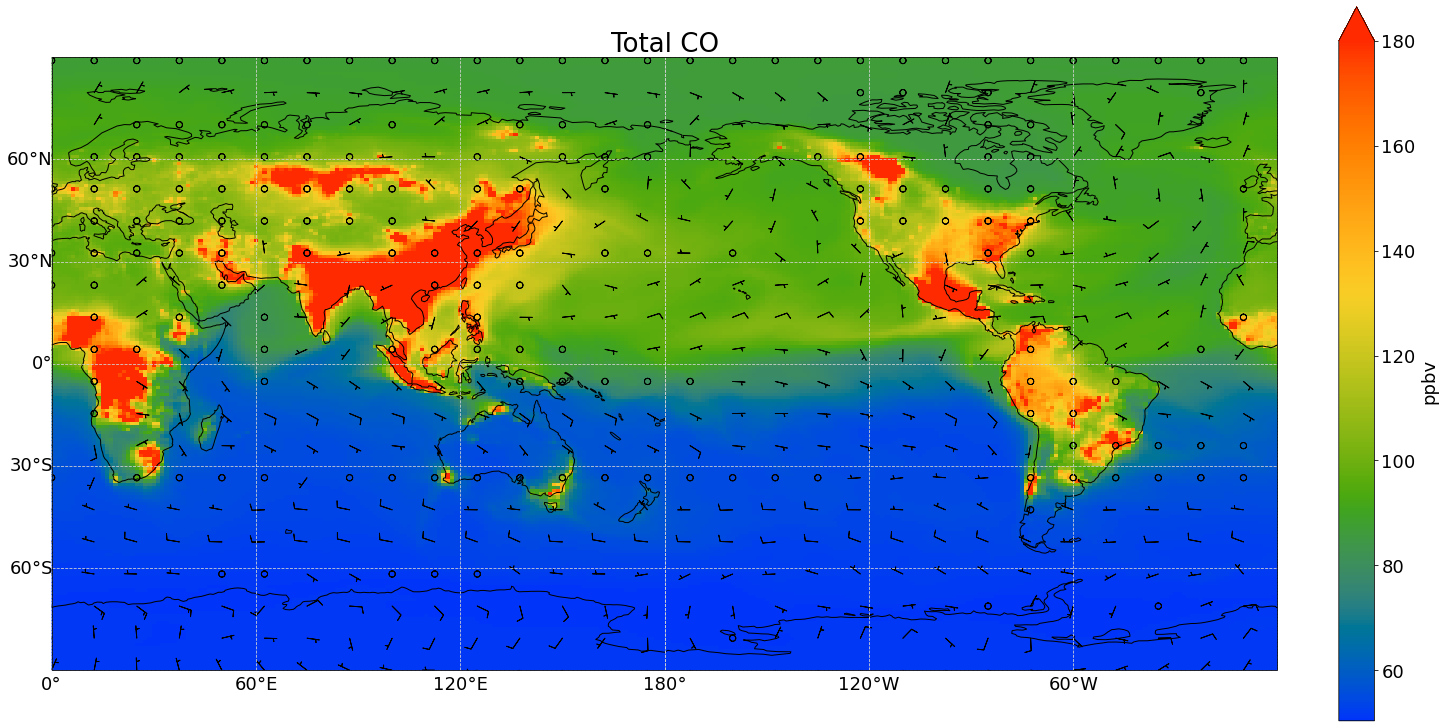

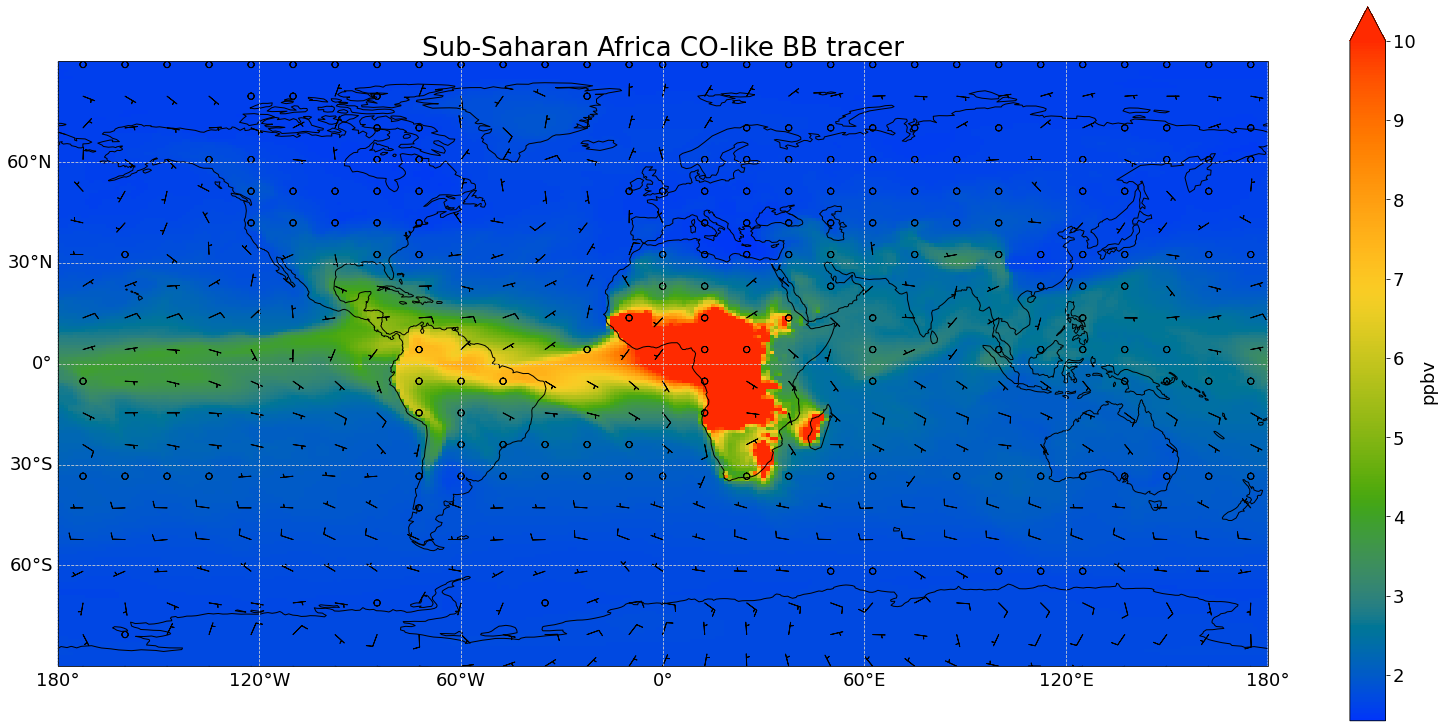

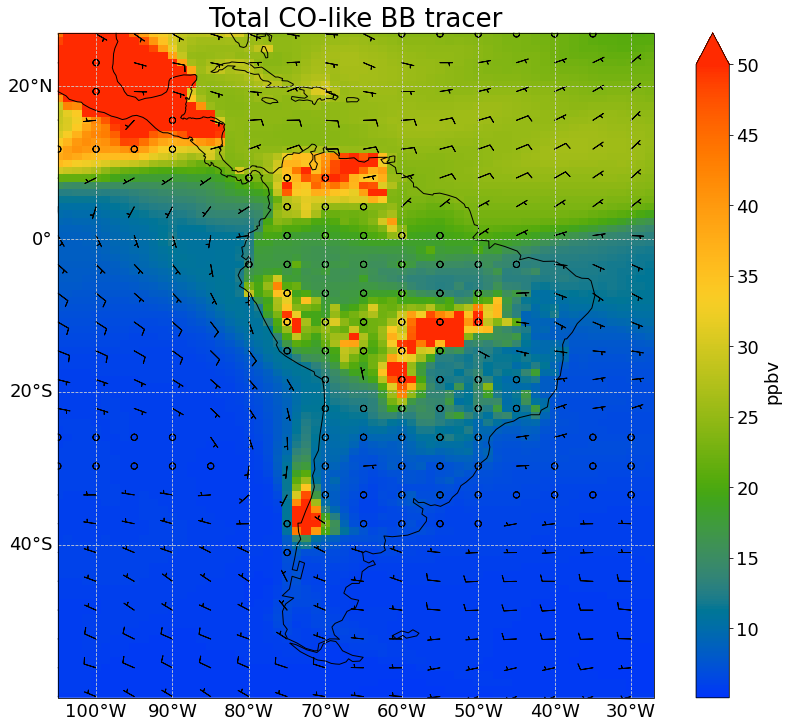

In [65]:
histfile = xr.open_dataset('f.e22.FCnudged.f09_f09_mg17.FVforspinup.cam.h0.2019-05.nc')
display(histfile)

var1 = 'CO10'
var2 = 'CO09'
var3 = 'CO12'
vert = 31
nthbarb = 10
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-65, 200, -60, 22])
(histfile[var1][0,vert,:,:]*1e9).plot(ax=ax, vmax=10, label='ppbv',
                                      cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow, 
                                transform=ccrs.PlateCarree())
ax.coastlines(linewidth=1.2)
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels=False
gl.top_labels=False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('Amazon CO-like BB tracer', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
(histfile[var2][0,vert,:,:]*1e9).plot(ax=ax, vmax=10, label='ppbv',
                                      cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow, 
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels=False
gl.top_labels=False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('Australian CO-like BB tracer', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
(histfile[var3][0,vert,:,:]*1e9).plot(ax=ax, vmax=10, label='ppbv',
                                      cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow, 
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels=False
gl.top_labels=False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('Sub-Saharan Africa CO-like BB tracer', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()


fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
(histfile['CO'][0,vert,:,:]*1e9).plot(ax=ax, vmax=180, label='ppbv',
                                      cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow,
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels=False
gl.top_labels=False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('Total CO', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))
(histfile['CO13'][0,vert,:,:]*1e9).plot(ax=ax, vmax=10, label='ppbv',
                                      cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow,
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels=False
gl.top_labels=False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('Sub-Saharan Africa CO-like BB tracer', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()


del fig
fig = plt.figure(figsize=(13, 10))
nthbarb=4
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(histfile['CO02'][0,vert,:,:]*1e9).plot(ax=ax, vmax=50, label='ppbv',
                                      cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow,
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels=False
gl.top_labels=False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('Total CO-like BB tracer', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

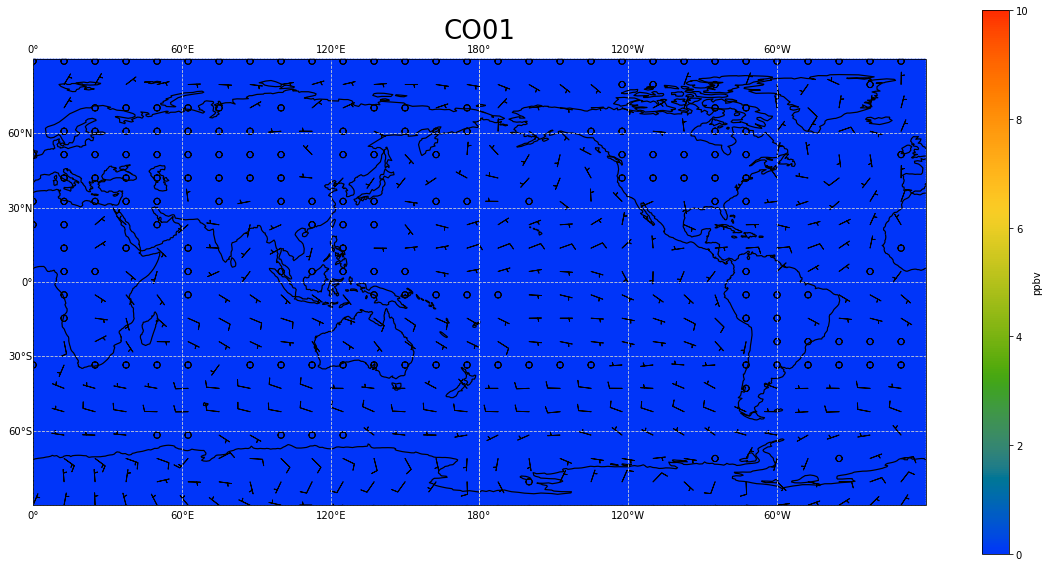

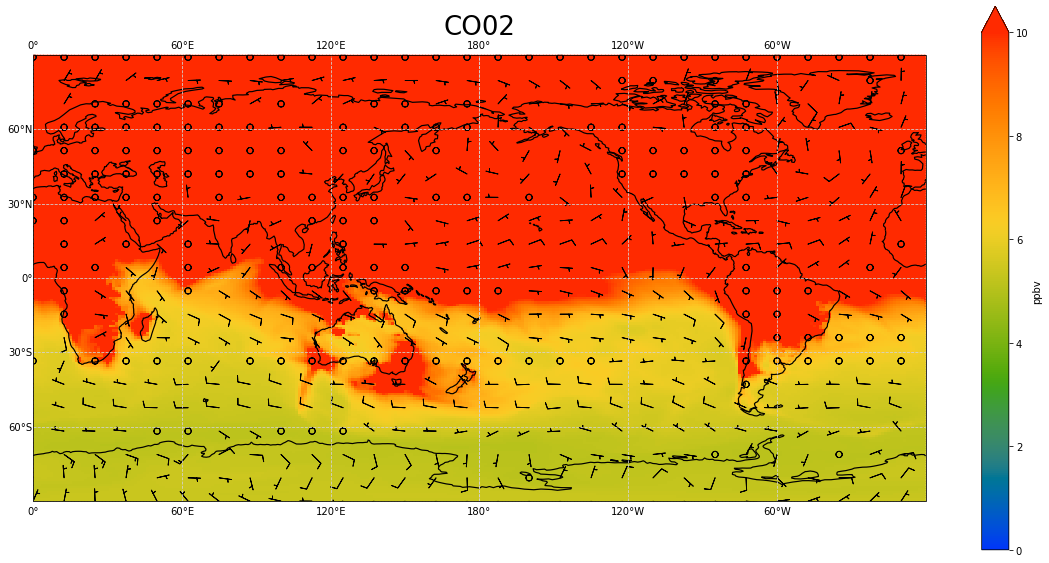

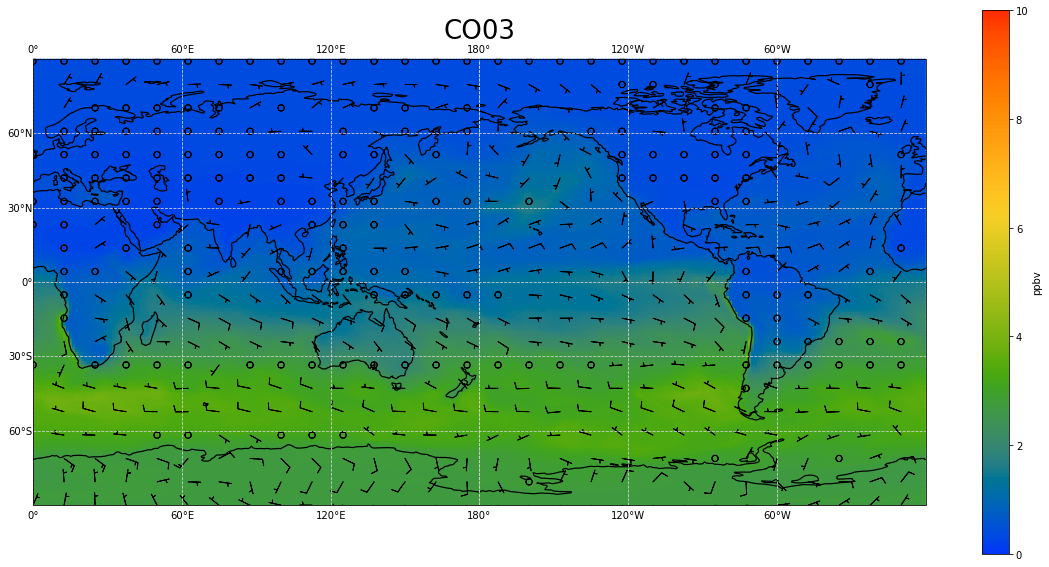

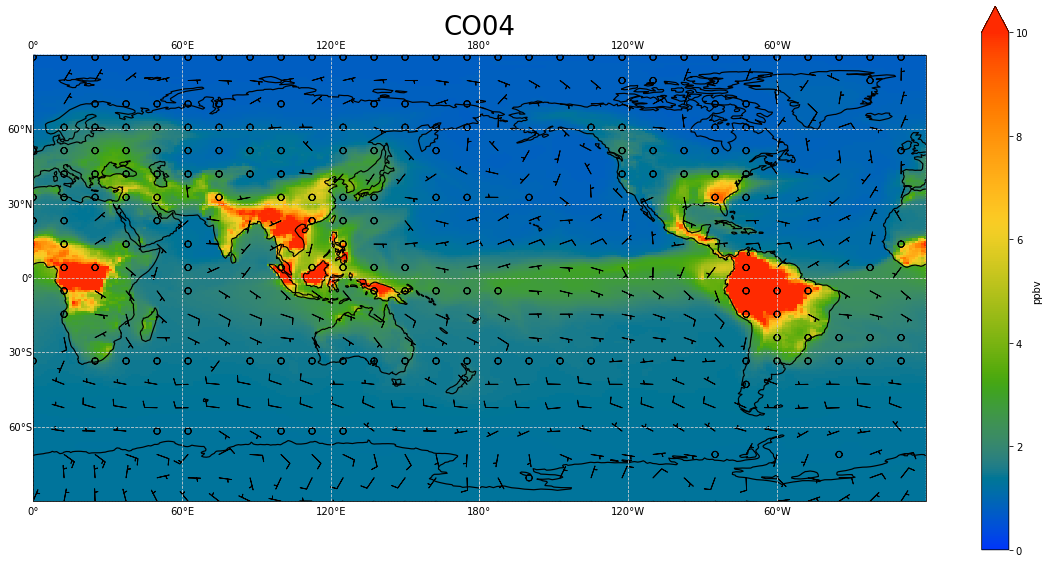

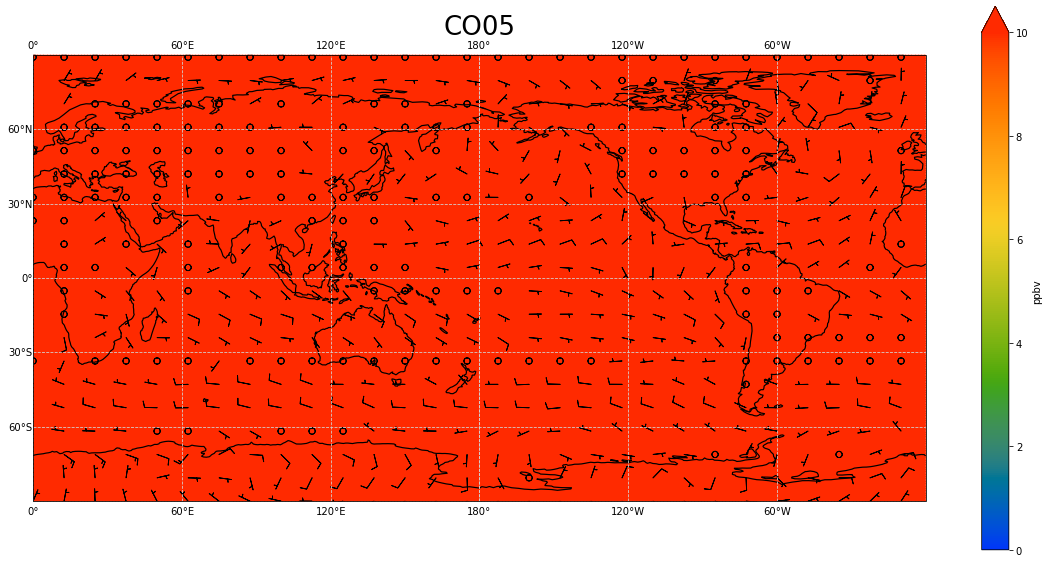

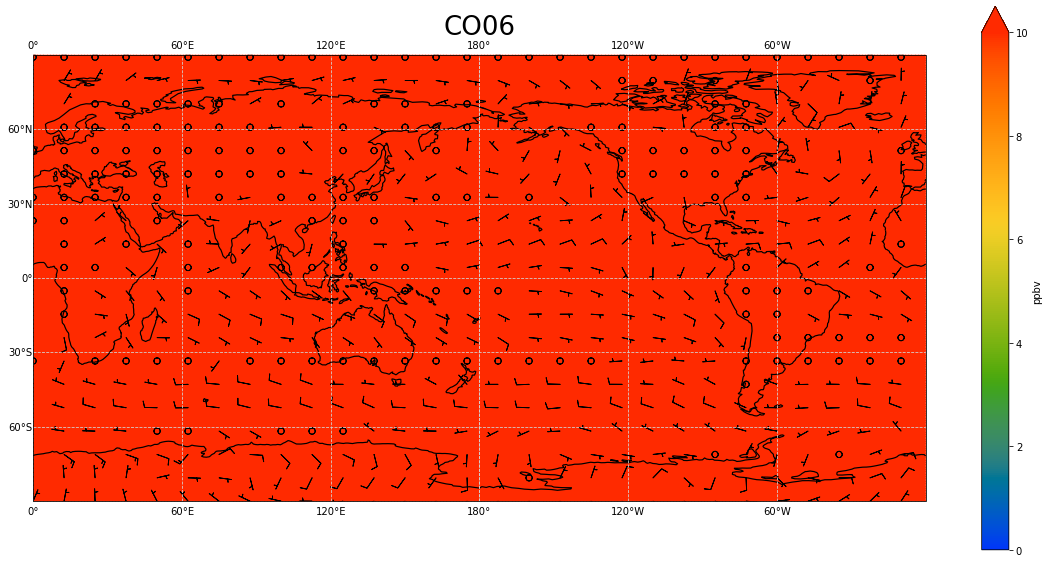

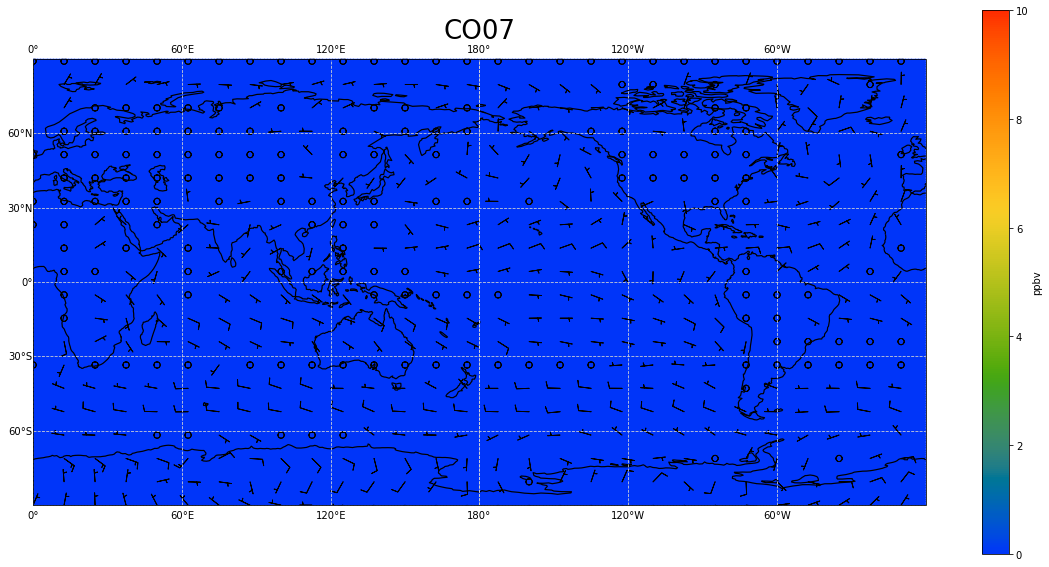

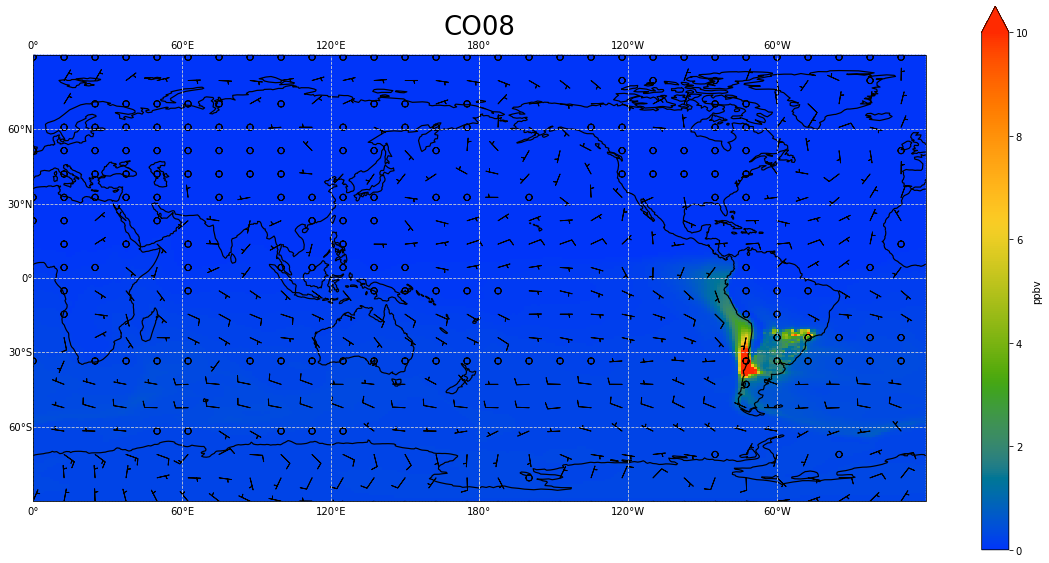

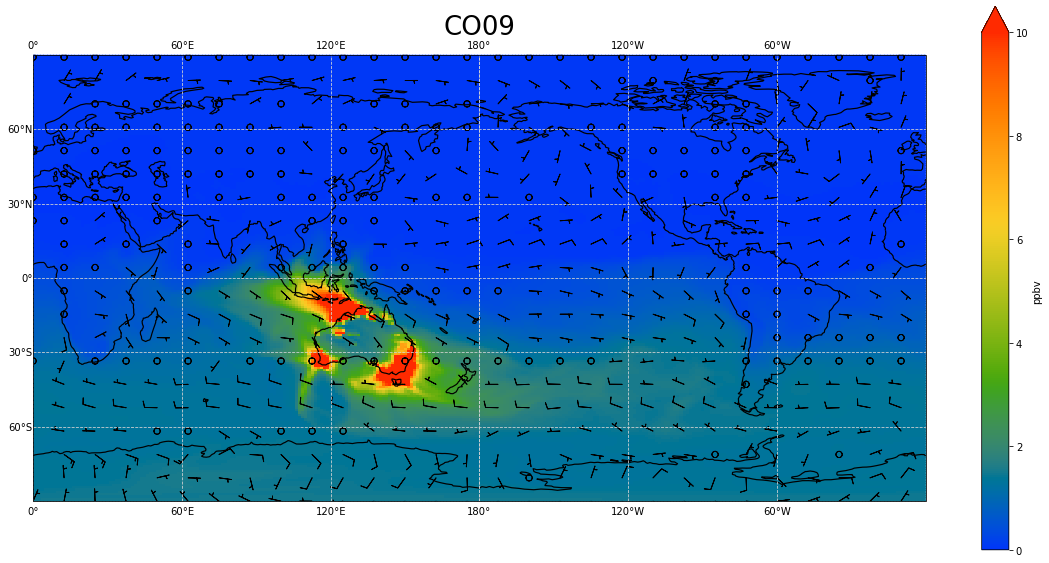

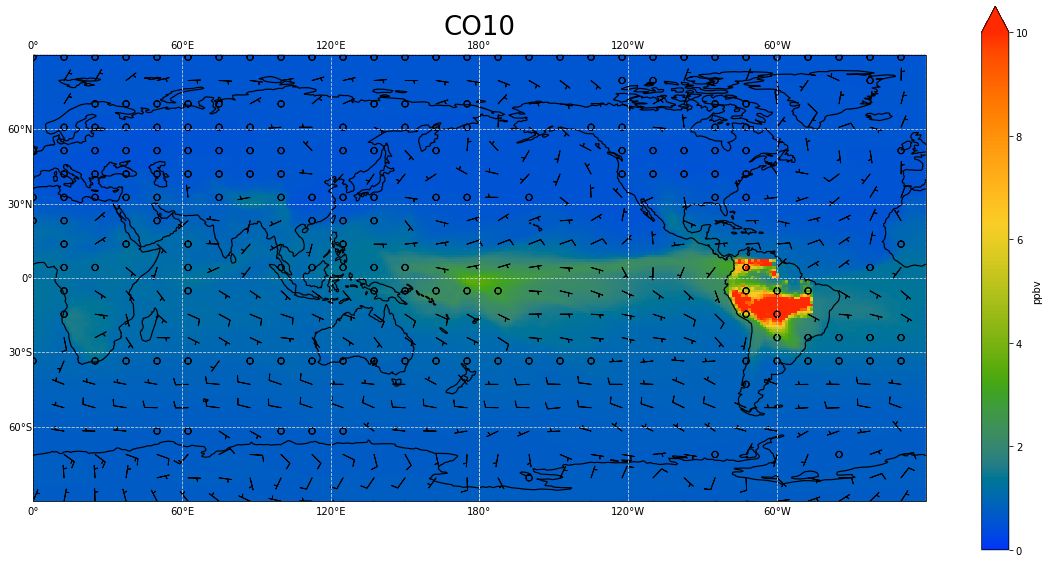

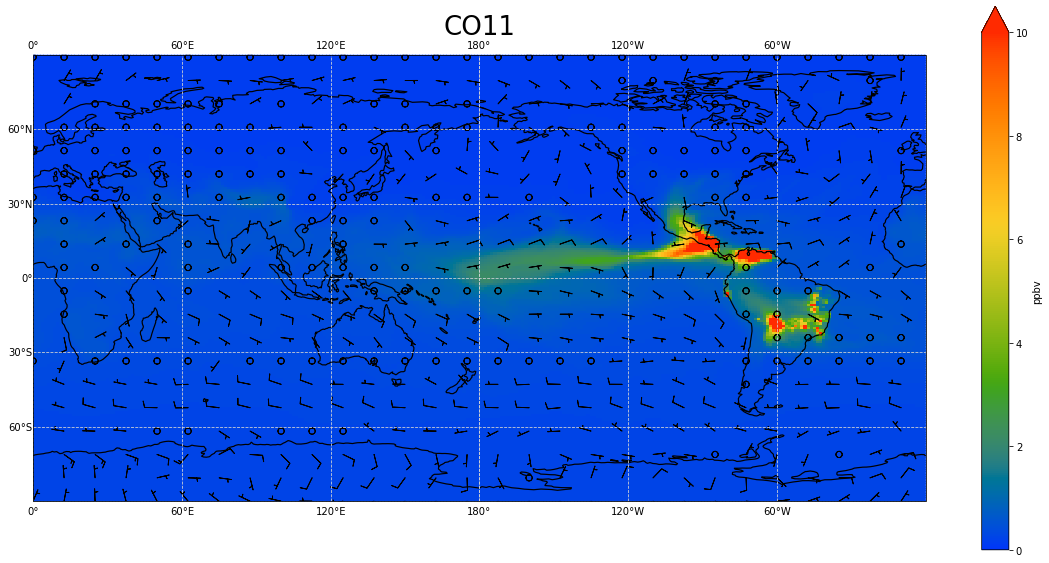

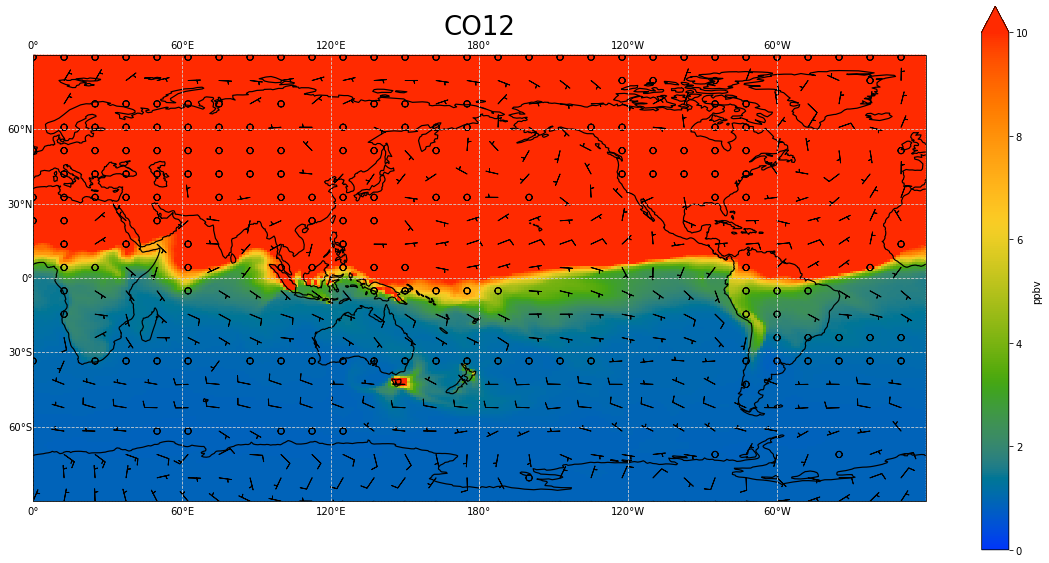

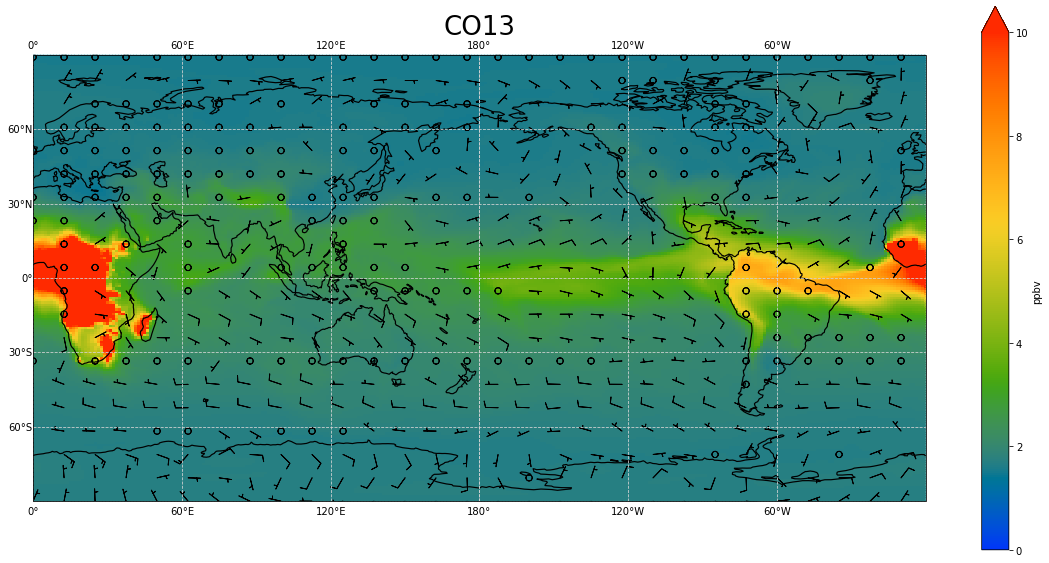

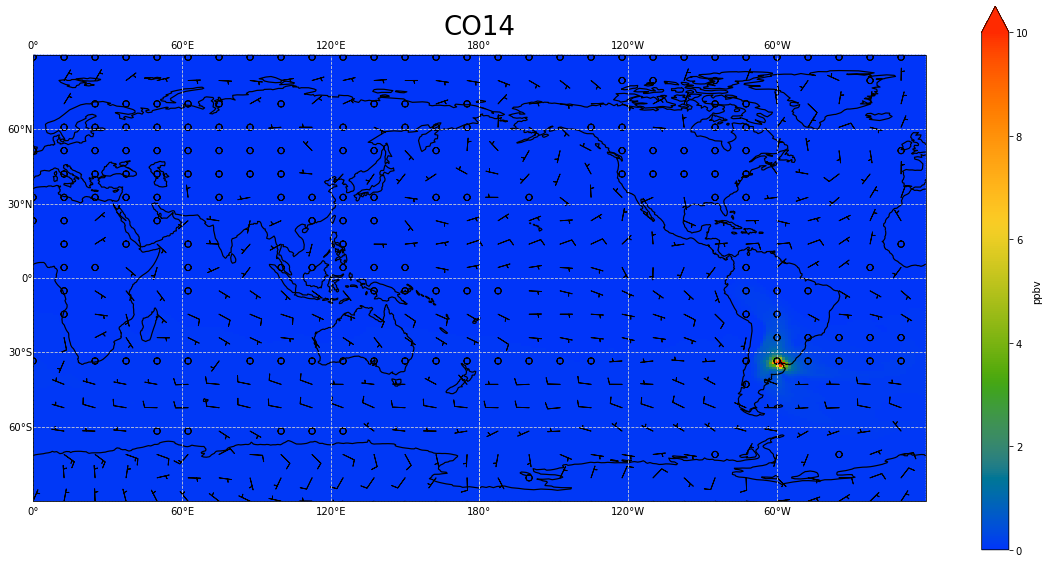

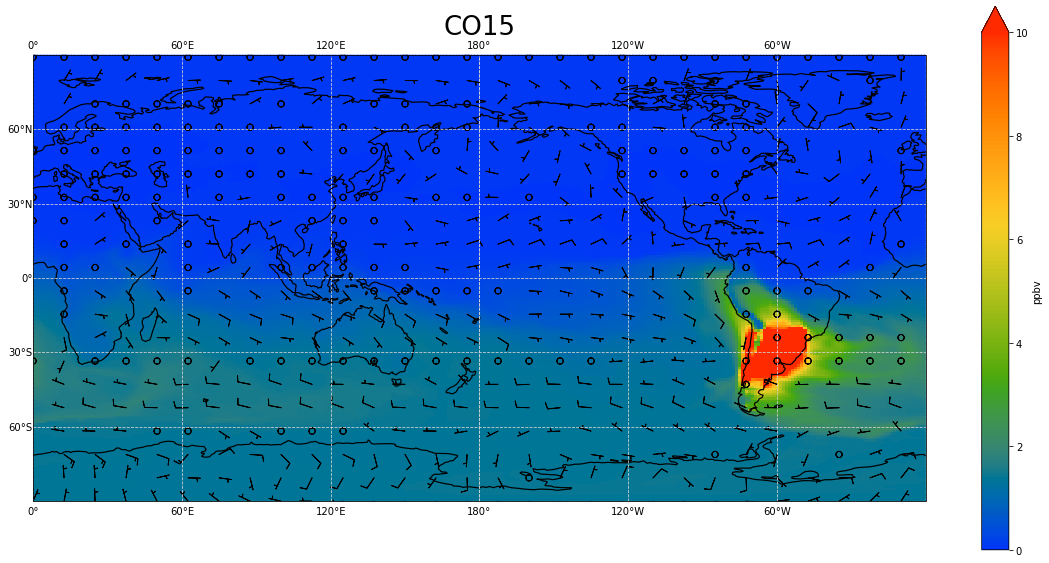

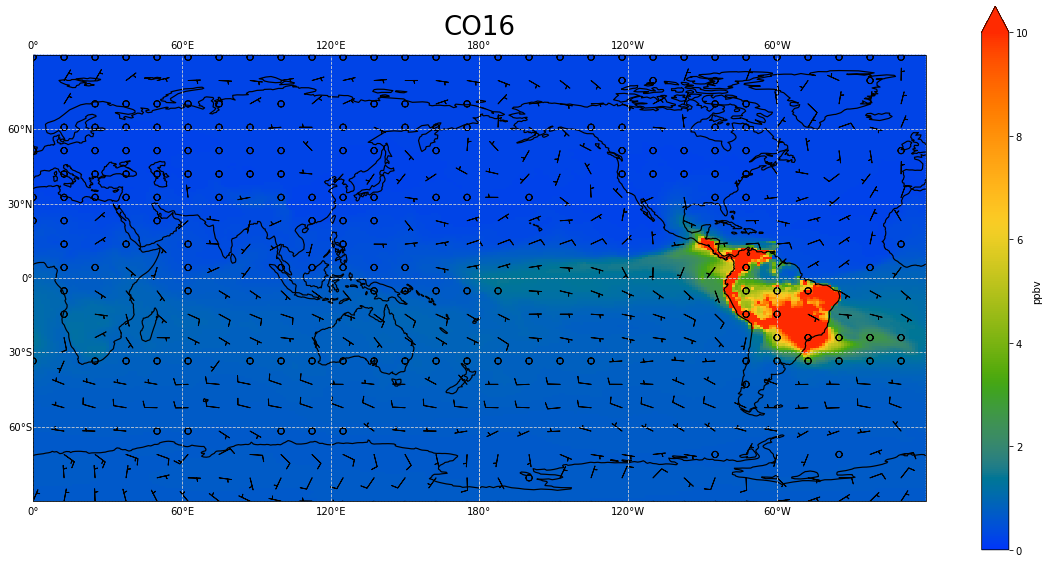

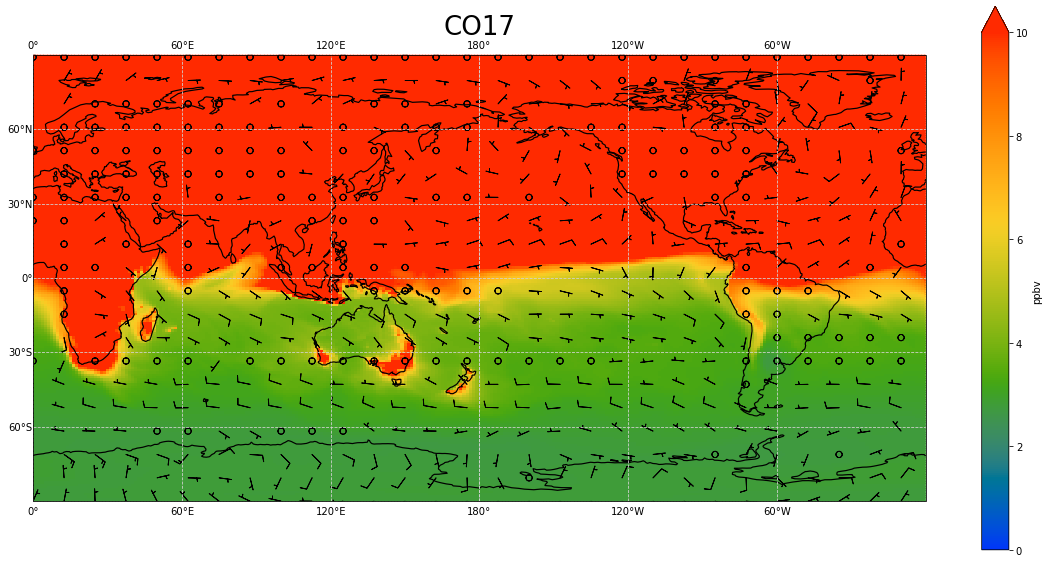

In [4]:
for i in range(1,18):

    var1 = f'CO{i:02}'
    vert = 31
    nthbarb = 10
    fig = plt.figure(figsize=(20, 10))
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
    (histfile[var1][0,vert,:,:]*1e9).plot(ax=ax, vmax=10, vmin=0, cbar_kwargs={'label':'ppbv'},
                                    cmap=cc.cm.rainbow,
                                    transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=1.2)
    ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
    #ax.add_feature(cfe.BORDERS)#, edgecolor='g')
    ax.set_title(f'CO{i:02}', fontsize=26)
    #(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
    #                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
    #                                transform=ccrs.PlateCarree())
    ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
             histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
             histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
             length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
             linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
    plt.show()

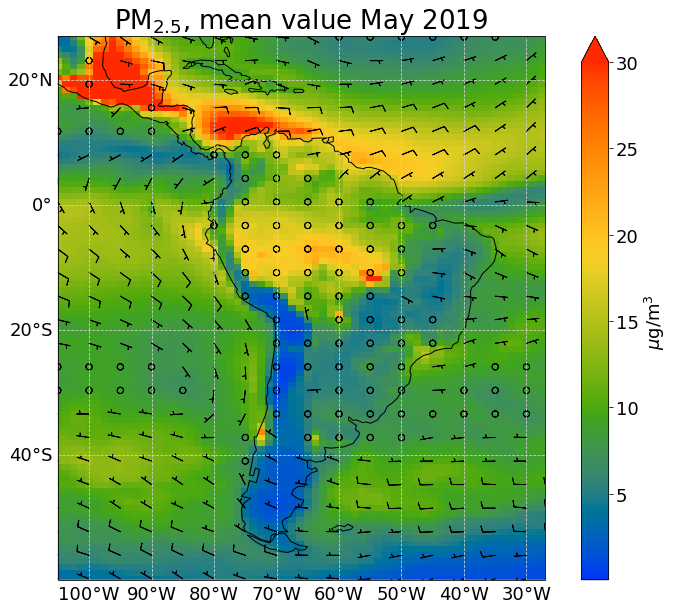

In [14]:
nthbarb=4

fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(histfile['PM25'][0,vert,:,:]*1e9).plot(ax=ax, vmax=30,
                                cmap=cc.cm.rainbow, cbar_kwargs={'label':'$\mu$g/m$^3$'},
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels = False
gl.top_labels = False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('PM$_{2.5}$, mean value May 2019', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()


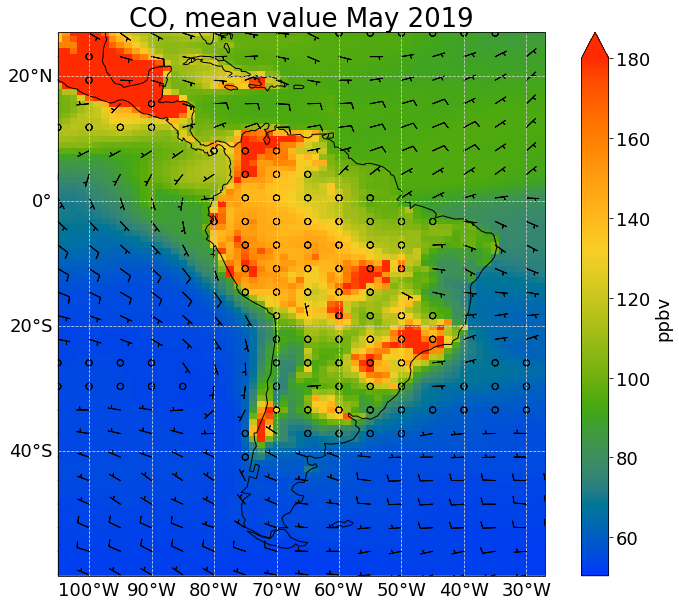

In [22]:
nthbarb=4

fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(histfile['CO'][0,vert,:,:]*1e9).plot(ax=ax, vmax=180, cbar_kwargs={'label':'ppbv'},
                                cmap=cc.cm.rainbow, #levels=np.linspace(0, 150.0, 11),
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels = False
gl.top_labels = False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('CO, mean value May 2019', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

<xarray.DataArray 'bc_a1' (time: 1, lev: 32, lat: 192, lon: 288)>
[1769472 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) object 2019-06-01 00:00:00
Attributes:
    mdims:         1
    units:         kg/kg
    mixing_ratio:  dry
    long_name:     bc_a1 concentration
    cell_methods:  time: mean


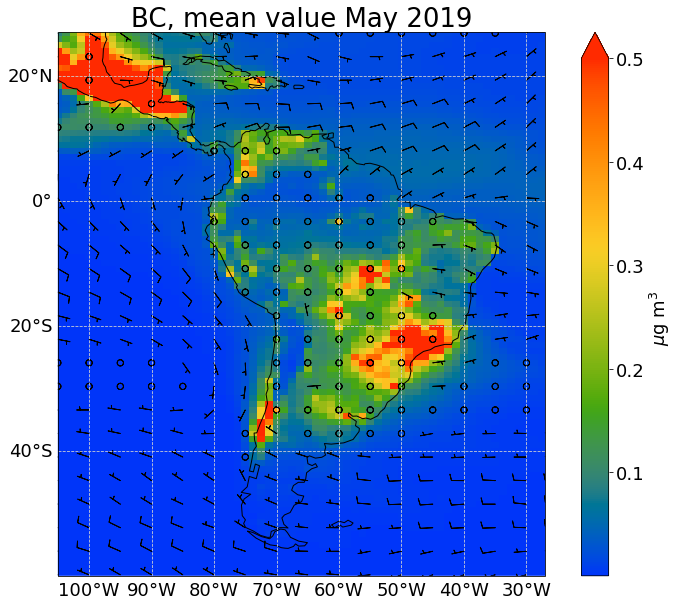

In [23]:
vert=31
var = histfile['bc_a1'] + histfile['bc_a4']
print(histfile['bc_a1'])

nthbarb=4


fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(var[0,vert,:,:]*1e9).plot(ax=ax, vmax=0.5, cbar_kwargs={'label':'$\mu$g m$^3$'},
                                cmap=cc.cm.rainbow, 
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels = False
gl.top_labels = False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('BC, mean value May 2019', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

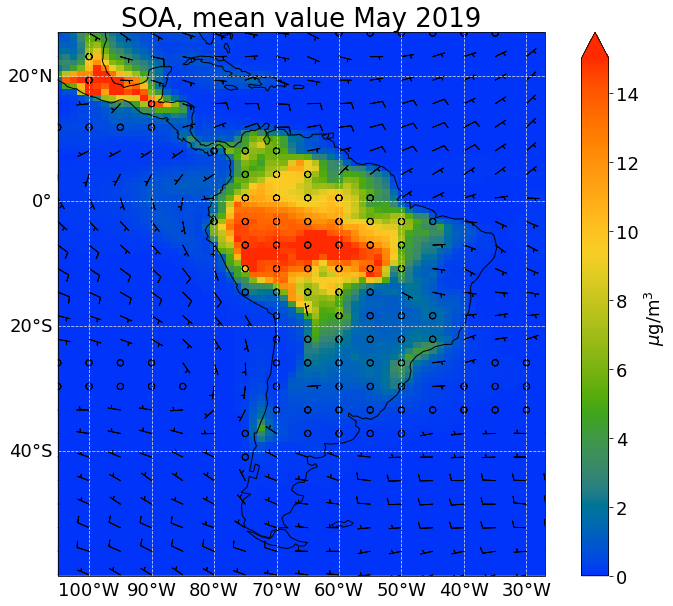

In [25]:
vert=31
var = (histfile['soa1_a1'] + histfile['soa1_a2'] +
       histfile['soa2_a1'] + histfile['soa2_a2'] + 
       histfile['soa3_a1'] + histfile['soa3_a2'] +
       histfile['soa4_a1'] + histfile['soa4_a2'] + 
       histfile['soa5_a1'] + histfile['soa5_a2'])
nthbarb=4


fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(var[0,vert,:,:]*1e9).plot(ax=ax, vmax=15,
                           cmap=cc.cm.rainbow, 
                           transform=ccrs.PlateCarree(),
                           cbar_kwargs={'label':'$\mu$g/m$^3$' })
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels = False
gl.top_labels = False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('SOA, mean value May 2019', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

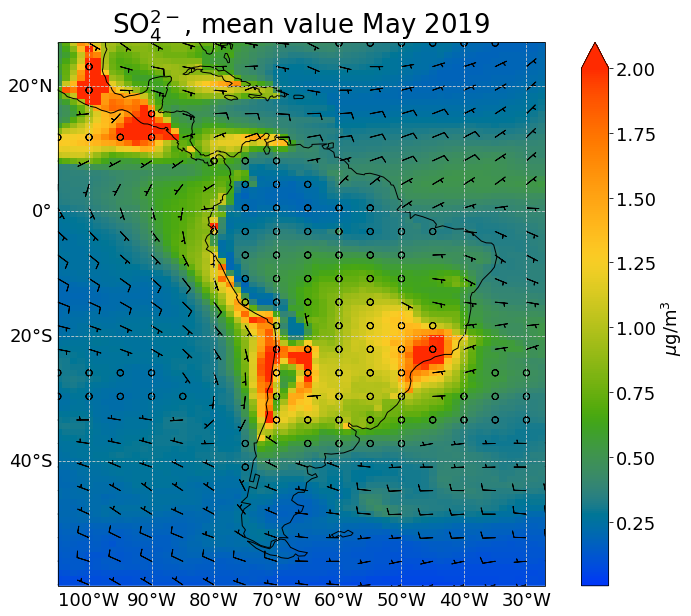

In [32]:
vert=31
var = (histfile['so4_a1'] + histfile['so4_a2'] +
       histfile['so4_a3'])
nthbarb=4


fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(var[0,vert,:,:]*1e9).plot(ax=ax, vmax=2, cbar_kwargs={'label':'$\mu$g/m$^3$'},
                                cmap=cc.cm.rainbow,
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels = False
gl.top_labels = False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('SO$_4^{2-}$, mean value May 2019', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

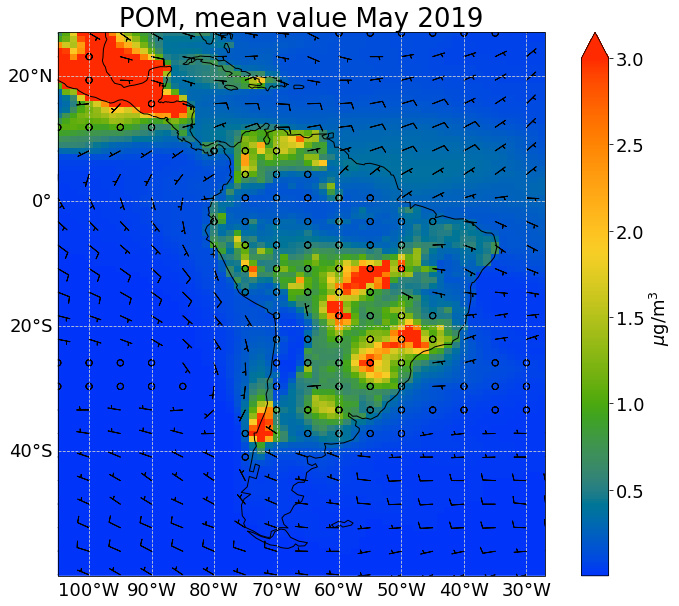

In [34]:
vert=31
var = (histfile['pom_a1'] + histfile['pom_a4'])
nthbarb=4


fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent((255, 333, -60, 27), ccrs.PlateCarree())
(var[0,vert,:,:]*1e9).plot(ax=ax, vmax=3, cbar_kwargs={'label':'$\mu$g/m$^3$'},
                                cmap=cc.cm.rainbow,
                                transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True)
gl.right_labels = False
gl.top_labels = False
#ax.add_feature(cfe.BORDERS)#, edgecolor='g')
ax.set_title('POM, mean value May 2019', fontsize=26)
#(histfile[var2][0,vert,:,:]*1e9).where(histfile['CO09'][0,vert,:,:] > 1e-11).plot(ax=ax, vmax=2, 
#                                cmap=cc.cm.rainbow, alpha=0.5, levels=np.linspace(0.5, 2.0, 16),
#                                transform=ccrs.PlateCarree())
ax.barbs(histfile['lon'].values[::nthbarb], histfile['lat'].values[::nthbarb],
         histfile['U'][0,vert,:,:].values[::nthbarb,::nthbarb],
         histfile['V'][0,vert,:,:].values[::nthbarb,::nthbarb],
         length=5, sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=0.95, transform=ccrs.PlateCarree(), color='k')
plt.show()

In [ ]:
# Data for Buenos Aires
#baires_2018 = xr.open_mfdataset('/glade/scratch/plichtig/TEMP/buenos*')
#dispaly(baires_2018)